# リポジトリクローン

In [1]:
%cd /content
!rm -rf DEIMv2
!git clone https://github.com/Intellindust-AI-Lab/DEIMv2
%cd DEIMv2

/content
Cloning into 'DEIMv2'...
remote: Enumerating objects: 429, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 429 (delta 36), reused 26 (delta 26), pack-reused 377 (from 2)
Receiving objects: 100% (429/429), 567.71 KiB | 3.24 MiB/s, done.
Resolving deltas: 100% (93/93), done.
/content/DEIMv2


# パッケージインストール

In [2]:
!pip install -q torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu124
!pip install -q faster-coco-eval
!pip install -q calflops onnx onnxruntime onnxsim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.2/908.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

# データセット準備（VOC→COCO形式）

In [3]:
%cd /content
!git clone https://github.com/Kazuhito00/YOLOX-Colaboratory-Training-Sample.git
!git clone https://github.com/Kazuhito00/convert_voc_to_coco.git
%cd DEIMv2

/content
Cloning into 'YOLOX-Colaboratory-Training-Sample'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 187 (delta 22), reused 18 (delta 18), pack-reused 161 (from 1)
Receiving objects: 100% (187/187), 30.13 MiB | 14.98 MiB/s, done.
Resolving deltas: 100% (84/84), done.
Cloning into 'convert_voc_to_coco'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 27 (delta 12), reused 14 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 11.77 KiB | 344.00 KiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/DEIMv2


In [4]:
dataset_directory = '/content/YOLOX-Colaboratory-Training-Sample/02.annotation_data'

In [5]:
import os

# 学習/検証データパス(train/validation data path)
train_directory = './train'
validation_directory = './validation'

# 学習データ格納ディレクトリ作成(Create training data storage directory)
os.makedirs(train_directory, exist_ok=True)
# 検証データ格納ディレクトリ作成(Create verification data storage directory)
os.makedirs(validation_directory, exist_ok=True)

In [6]:
import glob
import shutil
import random

# 学習データの割合(Percentage of training data)
train_ratio = 0.8

# コピー元ファイルリスト取得(Get copy source file list)
annotation_list = sorted(glob.glob(dataset_directory + '/*.xml'))
image_list = sorted(glob.glob(dataset_directory + '/*.jpg'))

file_num = len(annotation_list)

# インデックスシャッフル(shuffle)
index_list = list(range(file_num - 1))
random.shuffle(index_list)

for count, index in enumerate(index_list):
    if count < int(file_num * train_ratio):
        # 学習用データ(Training Data)
        shutil.copy2(annotation_list[index], train_directory)
        shutil.copy2(image_list[index], train_directory)
    else:
        # 検証用データ(Validation Data)
        shutil.copy2(annotation_list[index], validation_directory)
        shutil.copy2(image_list[index], validation_directory)

In [7]:
# Pascal VOC形式 を MS COCO形式へ変換
!python ../convert_voc_to_coco/convert_voc_to_coco.py \
    train train/train_annotations.json \
    --start_image_id=0
!python ../convert_voc_to_coco/convert_voc_to_coco.py \
    validation validation/validation_annotations.json \
    --start_image_id=10000000

Number of xml files: 40
Convert XML to JSON: 100% 40/40 [00:00<00:00, 8507.72it/s]
{'Fish': 225}
Success: train/train_annotations.json
Number of xml files: 9
Convert XML to JSON: 100% 9/9 [00:00<00:00, 7251.01it/s]
{'Fish': 44}
Success: validation/validation_annotations.json


# 学習設定yml準備

In [8]:
%%writefile my_deimv2_hgnetv2_n_coco.yml

__include__: [
  'configs/deimv2/deimv2_hgnetv2_n_coco.yml',
]

output_dir: ./output/my_deimv2_hgnetv2_n_coco  # 変更

num_classes: 2                                          # 変更(実際のクラス数+1を設定)
remap_mscoco_category: False                            # 変更

train_dataloader:
  total_batch_size: 4                                   # 変更
  dataset:
    img_folder: ./train/                                # 変更
    ann_file: ./train/train_annotations.json            # 変更

val_dataloader:
  total_batch_size: 4                                   # 変更
  dataset:
    img_folder: ./validation/                           # 変更
    ann_file: ./validation/validation_annotations.json  # 変更

Writing my_deimv2_hgnetv2_n_coco.yml


# 学習実施

In [9]:
!CUDA_VISIBLE_DEVICES=0 torchrun --nproc_per_node=1 train.py -c my_deimv2_hgnetv2_n_coco.yml --use-amp --seed=0 2>&1 | tee train_log.txt

2025-10-07 10:09:46.999627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759831787.020137    6781 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759831787.026532    6781 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759831787.042508    6781 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759831787.042532    6781 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759831787.042534    6781 computation_placer.cc:177] computation placer alr

# ONNX出力

In [10]:
!python tools/deployment/export_onnx.py \
    -c my_deimv2_hgnetv2_n_coco.yml \
    -r output/my_deimv2_hgnetv2_n_coco/best_stg2.pth

2025-10-07 10:21:49.388384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759832509.409523   23645 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759832509.415756   23645 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759832509.432478   23645 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759832509.432505   23645 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759832509.432509   23645 computation_placer.cc:177] computation placer alr

In [11]:
!cp output/my_deimv2_hgnetv2_n_coco/best_stg2.onnx deimv2_hgnetv2_n.onnx

# 推論テスト

In [12]:
import onnxruntime

# モデル読み込み
onnx_session = onnxruntime.InferenceSession(
    'deimv2_hgnetv2_n.onnx',
    providers=[
        'CPUExecutionProvider',
    ],
)
input_size = onnx_session.get_inputs()[0].shape
input_width, input_height = input_size[3], input_size[2]

print(onnx_session.get_providers())
print('input size:',input_size)

['CPUExecutionProvider']
input size: ['N', 3, 640, 640]


In [13]:
import cv2
import numpy as np

# 画像読み込み
image = cv2.imread('/content/YOLOX-Colaboratory-Training-Sample/02.annotation_data/000001.jpg')
image_height, image_width, _ = image.shape
original_size = np.array([[image_width, image_height]], dtype=np.int64)

# 前処理：BGR->RGB、リサイズ、正規化、NCHW
input_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_image = cv2.resize(input_image, (input_width, input_height))
input_image = input_image.astype(np.float32) / 255.0
input_image = np.transpose(input_image, (2, 0, 1))
input_image = np.expand_dims(input_image, axis=0)

In [14]:
%%time

# 推論
output = onnx_session.run(
    None,
    input_feed={'images': input_image, "orig_target_sizes": original_size}
)

labels, bboxes, scores = output

CPU times: user 287 ms, sys: 19 ms, total: 306 ms
Wall time: 78.7 ms


# 結果確認

In [15]:
import copy

# 描画
debug_image = copy.deepcopy(image)
score_threshold = 0.3

for label, bbox, score in zip(labels[0], bboxes[0], scores[0]):
    if score < score_threshold:
        continue

    cv2.rectangle(
        debug_image,
        (int(bbox[0]), int(bbox[1])),
        (int(bbox[2]), int(bbox[3])),
        (0, 255, 0),
        2,
    )
    cv2.putText(
        debug_image,
        str(label),
        (int(bbox[0]), int(bbox[1]-8)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (0, 255, 0),
        2,
    )

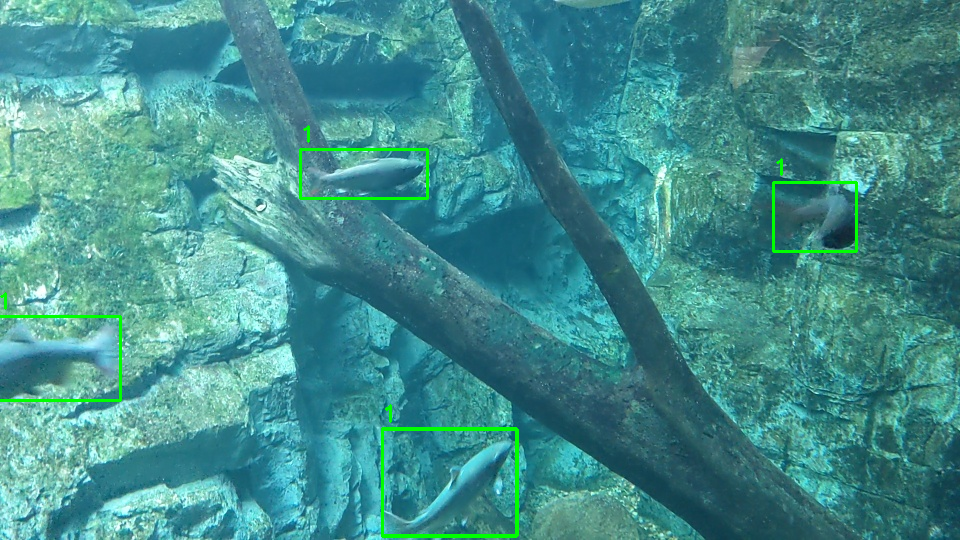

In [16]:
from google.colab.patches import cv2_imshow

cv2_imshow(debug_image)